# Assignment #1
## Base Feed Forward Neural Networks
Author: **Jakub Biegas**
Student index: **260344**

## Import MNIST dataset

In [1]:
from assignment_1.dataset import MnistDataset

mnist_dataset = MnistDataset(path="data/processed/mnist/train.csv", test_size=0.2)
mnist_dataset.X_train.shape, mnist_dataset.y_train.shape

((33600, 784), (33600,))

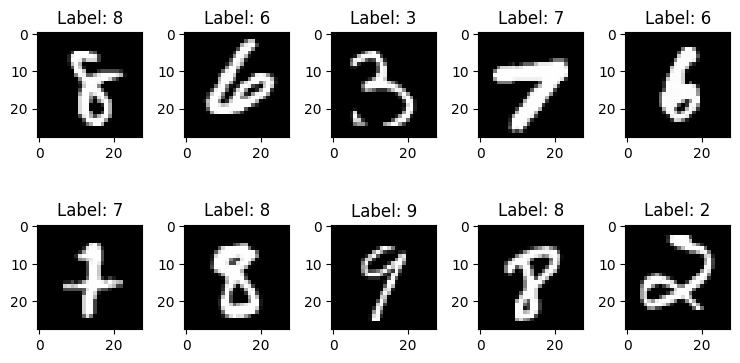

In [2]:
import matplotlib.pyplot as plt

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(num_row * num_col):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(mnist_dataset.X_train[i].reshape(28, 28), cmap="gray")
    ax.set_title("Label: {}".format(mnist_dataset.y_train[i]))
plt.tight_layout()
plt.show()

In [3]:
from assignment_1.models import NeuralNetwork
from assignment_1.utils.activation_functions import ReLUActivation, SoftmaxActivation
from assignment_1.utils.weights import XavierWeightInitializer, HeWeightInitializer

mnist_classification_nn = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

In [4]:
from assignment_1.utils.optimizers import MiniBatchOptimizer
from assignment_1.utils.loss_functions import CategoricalCrossEntropyLoss

mnist_optimizer = MiniBatchOptimizer(
    mnist_classification_nn,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=10,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.9062500 - loss 0.2917865
Epoch 2  --  accuracy 0.9062500 - loss 0.2297698
Epoch 3  --  accuracy 0.8906250 - loss 0.2333666
Epoch 4  --  accuracy 0.9218750 - loss 0.2368804
Epoch 5  --  accuracy 0.9375000 - loss 0.2262313
Epoch 6  --  accuracy 0.9218750 - loss 0.2470668
Epoch 7  --  accuracy 0.9531250 - loss 0.2490096
Epoch 8  --  accuracy 0.9218750 - loss 0.2125879
Epoch 9  --  accuracy 0.9375000 - loss 0.2016448
Epoch 10  --  accuracy 0.9375000 - loss 0.1686467


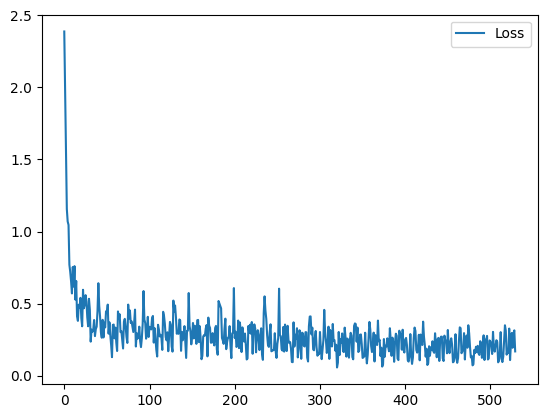

In [5]:
import matplotlib.pyplot as plt

plt.plot(mnist_optimizer.all_loss_values, label="Loss")
plt.legend(loc="upper right")
plt.show()

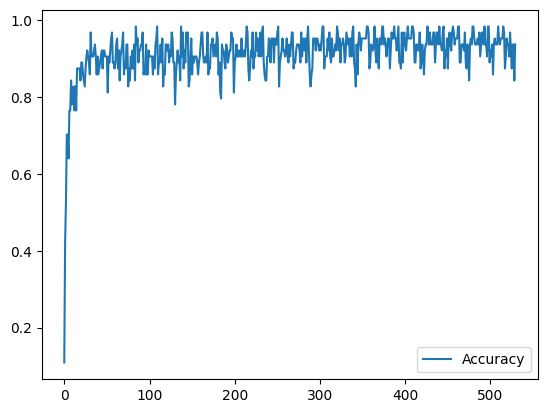

In [6]:
plt.plot(mnist_optimizer.all_accuracy_values, label="Accuracy")
plt.legend(loc="lower right")
plt.show()

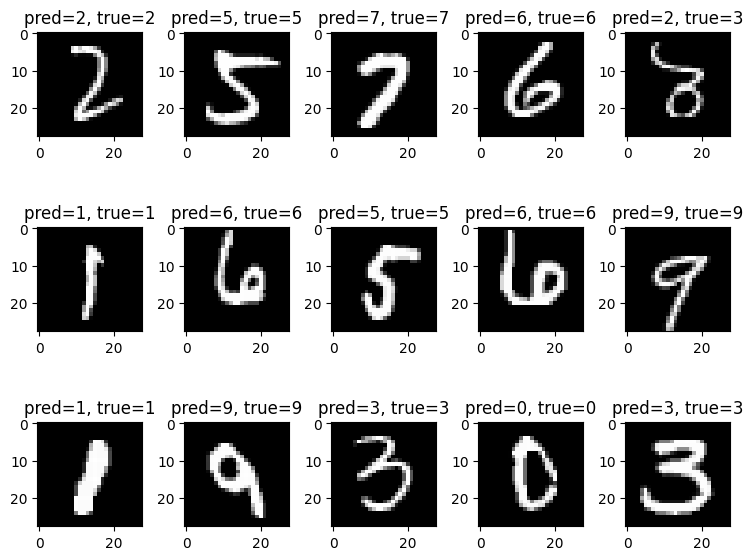

In [7]:
import numpy as np

num_row = 3
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(num_row * num_col):
    ax = axes[i // num_col, i % num_col]
    random_index = np.random.randint(0, mnist_dataset.X_test.shape[0])
    ax.imshow(mnist_dataset.X_test[random_index].reshape(28, 28), cmap="gray")
    prediction = np.argmax(
        mnist_classification_nn.forward(mnist_dataset.X_test[random_index]), axis=1
    )
    correct_label = mnist_dataset.y_test[random_index]
    ax.set_title("pred={}, true={}".format(prediction[0], correct_label))
plt.tight_layout()
plt.show()

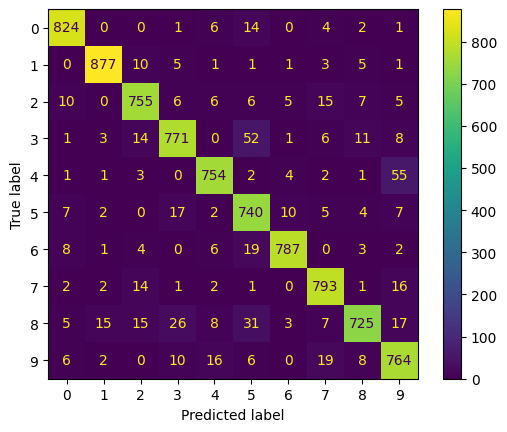

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = np.argmax(mnist_classification_nn.forward(mnist_dataset.X_test), axis=1)
cm = confusion_matrix(mnist_dataset.y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
cm_display.plot()

## Forest Fires Dataset

In [9]:
from assignment_1.dataset import ForestFiresDataset
from assignment_1.models import NeuralNetwork
from assignment_1.utils.activation_functions import (
    SigmoidActivation,
    LinearActivation,
    ReLUActivation,
)

forest_fires_dataset = ForestFiresDataset(
    path="data/processed/forest+fires/forestfires.csv", test_size=0.1
)

forest_fires_regression_nn = NeuralNetwork(
    input_dim=12,
    hidden_dim=256,
    output_dim=1,
    num_of_hidden_layers=2,
    weight_initializer=XavierWeightInitializer(),
    activation_function=SigmoidActivation(),
    output_activation_function=ReLUActivation(),
)

print(forest_fires_dataset.X_train.shape, forest_fires_dataset.y_train.shape)

(465, 12) (465, 1)


In [10]:
from assignment_1.utils.loss_functions import MeanSquaredError, MeanAbsoluteError
from assignment_1.utils.optimizers import MiniBatchOptimizer

forest_fires_optimizer = MiniBatchOptimizer(
    forest_fires_regression_nn,
    loss_function=MeanSquaredError(),
    batch_size=128,
    epochs=1000,
    learning_rate=0.00001,
)
forest_fires_optimizer.optimize(
    forest_fires_dataset.X_train, forest_fires_dataset.y_train.reshape(-1, 1)
)

Started optimization of NeuralNetwork, classification=False
Epoch 1  --  accuracy 0.6640625 - loss 3.1194865
Epoch 2  --  accuracy 0.6718750 - loss 3.1088201
Epoch 3  --  accuracy 0.6796875 - loss 3.0982695
Epoch 4  --  accuracy 0.6796875 - loss 3.0878332
Epoch 5  --  accuracy 0.6796875 - loss 3.0775097
Epoch 6  --  accuracy 0.6796875 - loss 3.0672978
Epoch 7  --  accuracy 0.6796875 - loss 3.0571963
Epoch 8  --  accuracy 0.6875000 - loss 3.0472041
Epoch 9  --  accuracy 0.6875000 - loss 3.0373202
Epoch 10  --  accuracy 0.6875000 - loss 3.0275434
Epoch 11  --  accuracy 0.6875000 - loss 3.0178731
Epoch 12  --  accuracy 0.6875000 - loss 3.0083084
Epoch 13  --  accuracy 0.6875000 - loss 2.9988488
Epoch 14  --  accuracy 0.6875000 - loss 2.9894936
Epoch 15  --  accuracy 0.6875000 - loss 2.9802427
Epoch 16  --  accuracy 0.6875000 - loss 2.9710958
Epoch 17  --  accuracy 0.6875000 - loss 2.9620524
Epoch 18  --  accuracy 0.6875000 - loss 2.9531124
Epoch 19  --  accuracy 0.6875000 - loss 2.9442752

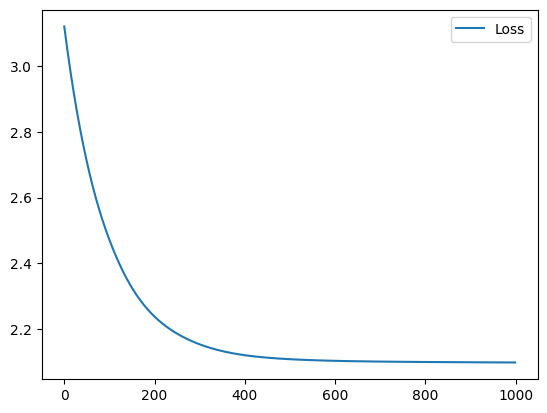

In [11]:
import matplotlib.pyplot as plt

plt.plot(forest_fires_optimizer.all_loss_values, label="Loss")
plt.legend(loc="upper right")
plt.show()

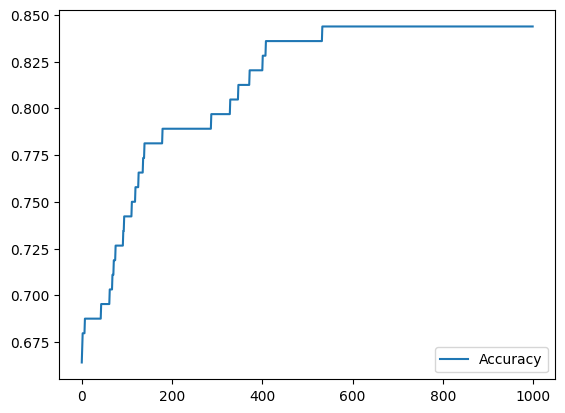

In [12]:
plt.plot(forest_fires_optimizer.all_accuracy_values, label="Accuracy")
plt.legend(loc="lower right")
plt.show()

## Experiments on MNIST dataset

### Experiments with network dimensionality

In [13]:
mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_classification_nn_64 = NeuralNetwork(
    input_dim=784,
    hidden_dim=64,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_classification_nn_256 = NeuralNetwork(
    input_dim=784,
    hidden_dim=256,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

In [14]:
epochs = 10

mnist_optimizer_32 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_32.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_optimizer_64 = MiniBatchOptimizer(
    mnist_classification_nn_64,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_64.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_optimizer_256 = MiniBatchOptimizer(
    mnist_classification_nn_256,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_256.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.9531250 - loss 0.2070604
Epoch 2  --  accuracy 0.9375000 - loss 0.1560891
Epoch 3  --  accuracy 0.9687500 - loss 0.1273345
Epoch 4  --  accuracy 0.9531250 - loss 0.1540030
Epoch 5  --  accuracy 0.9531250 - loss 0.1383602
Epoch 6  --  accuracy 0.9843750 - loss 0.1233692
Epoch 7  --  accuracy 0.9687500 - loss 0.1086838
Epoch 8  --  accuracy 0.9687500 - loss 0.1089618
Epoch 9  --  accuracy 0.9843750 - loss 0.0947076
Epoch 10  --  accuracy 0.9843750 - loss 0.0860873
Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.9218750 - loss 0.2163096
Epoch 2  --  accuracy 0.9687500 - loss 0.1139493
Epoch 3  --  accuracy 1.0000000 - loss 0.0574922
Epoch 4  --  accuracy 1.0000000 - loss 0.0471554
Epoch 5  --  accuracy 1.0000000 - loss 0.0440386
Epoch 6  --  accuracy 1.0000000 - loss 0.0521964
Epoch 7  --  accuracy 1.0000000 - loss 0.0334166
Epoch 8  --  accuracy 1.0000000 - loss 0.0365842

In [15]:
epochs = range(1, len(mnist_optimizer_256.all_loss_values) + 1)

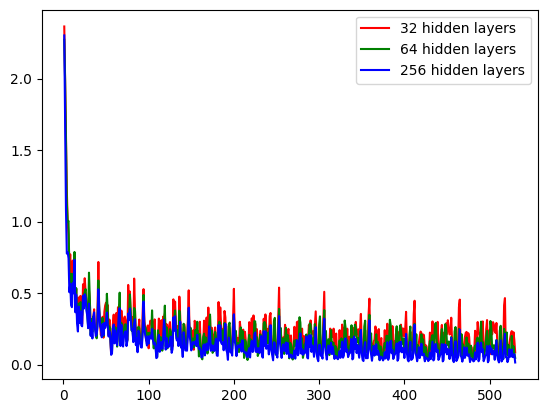

In [16]:
plt.plot(epochs, mnist_optimizer_32.all_loss_values, "r", label="32 hidden layers")
plt.plot(epochs, mnist_optimizer_64.all_loss_values, "g", label="64 hidden layers")
plt.plot(epochs, mnist_optimizer_256.all_loss_values, "b", label="256 hidden layers")
plt.legend(loc="upper right")
plt.show()

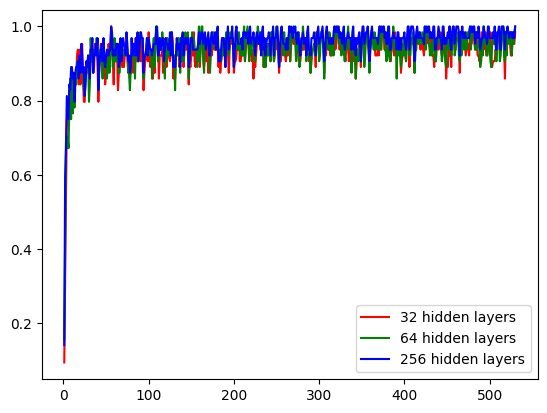

In [17]:
plt.plot(epochs, mnist_optimizer_32.all_accuracy_values, "r", label="32 hidden layers")
plt.plot(epochs, mnist_optimizer_64.all_accuracy_values, "g", label="64 hidden layers")
plt.plot(
    epochs, mnist_optimizer_256.all_accuracy_values, "b", label="256 hidden layers"
)
plt.legend(loc="lower right")
plt.show()

### Experiments with hyperparameters

In [18]:
mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_optimizer_10_01 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=10,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_10_01.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_optimizer_20_01 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=20,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_20_01.optimize(mnist_dataset.X_train, mnist_dataset.y_train)


mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_optimizer_30_01 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=30,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_30_01.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_optimizer_30_001 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=30,
    learning_rate=0.001,
    classification=True,
)
mnist_optimizer_30_001.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_classification_nn_32 = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_optimizer_30_00001 = MiniBatchOptimizer(
    mnist_classification_nn_32,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=30,
    learning_rate=0.0001,
    classification=True,
)
mnist_optimizer_30_00001.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.8906250 - loss 0.2556052
Epoch 2  --  accuracy 0.9218750 - loss 0.2076132
Epoch 3  --  accuracy 0.9375000 - loss 0.1630024
Epoch 4  --  accuracy 0.9531250 - loss 0.1691457
Epoch 5  --  accuracy 0.9531250 - loss 0.1233381
Epoch 6  --  accuracy 0.9843750 - loss 0.1004839
Epoch 7  --  accuracy 0.9843750 - loss 0.0776497
Epoch 8  --  accuracy 0.9843750 - loss 0.0735934
Epoch 9  --  accuracy 0.9843750 - loss 0.0641186
Epoch 10  --  accuracy 0.9843750 - loss 0.0719898
Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.8906250 - loss 0.2525922
Epoch 2  --  accuracy 0.8906250 - loss 0.2737221
Epoch 3  --  accuracy 0.9375000 - loss 0.2320889
Epoch 4  --  accuracy 0.9531250 - loss 0.1735953
Epoch 5  --  accuracy 0.9687500 - loss 0.1442533
Epoch 6  --  accuracy 0.9843750 - loss 0.1233767
Epoch 7  --  accuracy 0.9843750 - loss 0.1130038
Epoch 8  --  accuracy 0.9843750 - loss 0.1273964

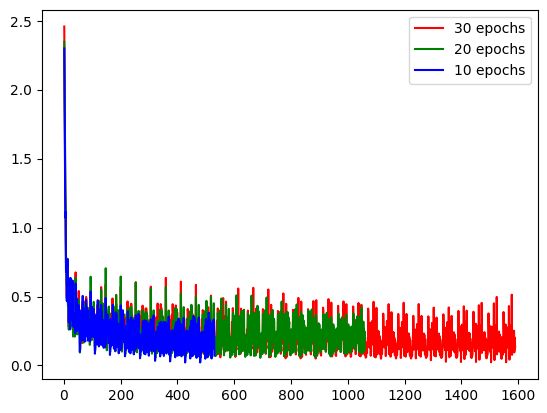

In [19]:
plt.plot(
    range(1, len(mnist_optimizer_30_01.all_loss_values) + 1),
    mnist_optimizer_30_01.all_loss_values,
    "r",
    label="30 epochs",
)
plt.plot(
    range(1, len(mnist_optimizer_20_01.all_loss_values) + 1),
    mnist_optimizer_20_01.all_loss_values,
    "g",
    label="20 epochs",
)
plt.plot(
    range(1, len(mnist_optimizer_10_01.all_loss_values) + 1),
    mnist_optimizer_10_01.all_loss_values,
    "b",
    label="10 epochs",
)
plt.legend(loc="upper right")
plt.show()

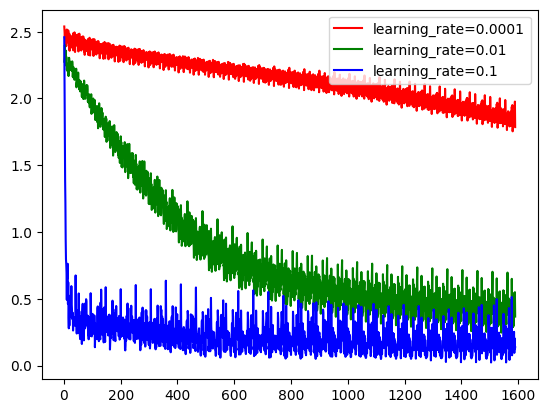

In [25]:
plt.plot(
    range(1, len(mnist_optimizer_30_00001.all_loss_values) + 1),
    mnist_optimizer_30_00001.all_loss_values,
    "r",
    label="learning_rate=0.0001",
)
plt.plot(
    range(1, len(mnist_optimizer_30_001.all_loss_values) + 1),
    mnist_optimizer_30_001.all_loss_values,
    "g",
    label="learning_rate=0.01",
)
plt.plot(
    range(1, len(mnist_optimizer_30_01.all_loss_values) + 1),
    mnist_optimizer_30_01.all_loss_values,
    "b",
    label="learning_rate=0.1",
)
plt.legend(loc="upper right")
plt.show()

### Impact of weight initialization strategies on model performance

In [21]:
from assignment_1.utils.weights import (
    RandomWeightInitializer,
    XavierWeightInitializer,
    HeWeightInitializer,
)


mnist_classification_nn_32_random_weights = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=RandomWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_classification_nn_32_xavier_weights = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=XavierWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

mnist_classification_nn_32_he_weights = NeuralNetwork(
    input_dim=784,
    hidden_dim=32,
    output_dim=10,
    num_of_hidden_layers=2,
    weight_initializer=HeWeightInitializer(),
    activation_function=ReLUActivation(),
    output_activation_function=SoftmaxActivation(),
)

In [22]:
epochs = 10

mnist_optimizer_32_random_weights = MiniBatchOptimizer(
    mnist_classification_nn_32_random_weights,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_32_random_weights.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_optimizer_32_xavier_weights = MiniBatchOptimizer(
    mnist_classification_nn_32_xavier_weights,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_32_xavier_weights.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

mnist_optimizer_32_he_weights = MiniBatchOptimizer(
    mnist_classification_nn_32_he_weights,
    loss_function=CategoricalCrossEntropyLoss(),
    batch_size=64,
    epochs=epochs,
    learning_rate=0.1,
    classification=True,
)
mnist_optimizer_32_he_weights.optimize(mnist_dataset.X_train, mnist_dataset.y_train)

Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.1875000 - loss 2.2176131
Epoch 2  --  accuracy 0.8437500 - loss 0.5390860
Epoch 3  --  accuracy 0.8906250 - loss 0.3338784
Epoch 4  --  accuracy 0.9375000 - loss 0.2701503
Epoch 5  --  accuracy 0.9687500 - loss 0.2179294
Epoch 6  --  accuracy 0.9687500 - loss 0.1742811
Epoch 7  --  accuracy 0.9687500 - loss 0.1603203
Epoch 8  --  accuracy 0.9843750 - loss 0.1424140
Epoch 9  --  accuracy 0.9531250 - loss 0.1586279
Epoch 10  --  accuracy 0.9218750 - loss 0.1929068
Started optimization of NeuralNetwork, classification=True
Epoch 1  --  accuracy 0.8906250 - loss 0.2630133
Epoch 2  --  accuracy 0.9843750 - loss 0.1758341
Epoch 3  --  accuracy 0.9687500 - loss 0.1382410
Epoch 4  --  accuracy 0.9218750 - loss 0.1635990
Epoch 5  --  accuracy 0.9375000 - loss 0.1671321
Epoch 6  --  accuracy 0.9531250 - loss 0.1479848
Epoch 7  --  accuracy 0.9375000 - loss 0.1493685
Epoch 8  --  accuracy 0.9531250 - loss 0.1408116

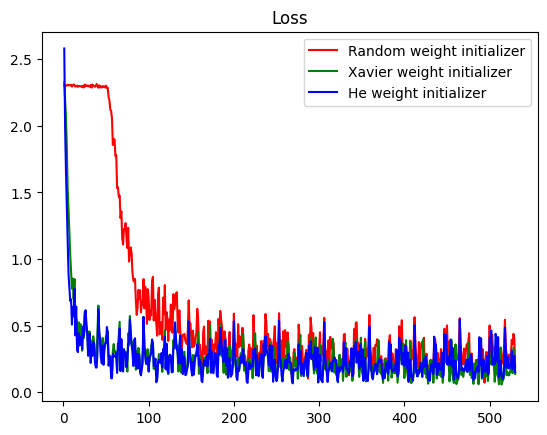

In [23]:
plt.plot(
    range(1, len(mnist_optimizer_32_random_weights.all_loss_values) + 1),
    mnist_optimizer_32_random_weights.all_loss_values,
    "r",
    label="Random weight initializer",
)
plt.plot(
    range(1, len(mnist_optimizer_32_xavier_weights.all_loss_values) + 1),
    mnist_optimizer_32_xavier_weights.all_loss_values,
    "g",
    label="Xavier weight initializer",
)
plt.plot(
    range(1, len(mnist_optimizer_32_he_weights.all_loss_values) + 1),
    mnist_optimizer_32_he_weights.all_loss_values,
    "b",
    label="He weight initializer",
)
plt.title("Loss")
plt.legend(loc="upper right")
plt.show()

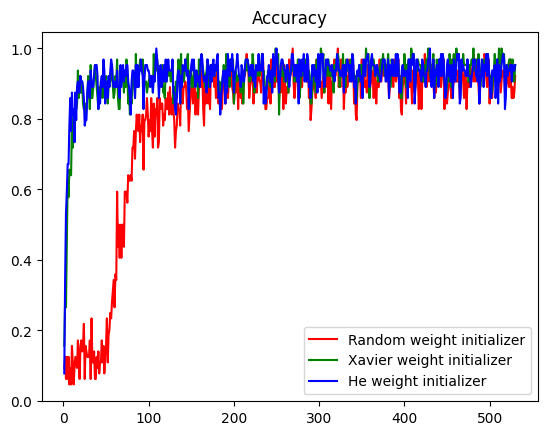

In [24]:
plt.plot(
    range(1, len(mnist_optimizer_32_random_weights.all_accuracy_values) + 1),
    mnist_optimizer_32_random_weights.all_accuracy_values,
    "r",
    label="Random weight initializer",
)
plt.plot(
    range(1, len(mnist_optimizer_32_xavier_weights.all_accuracy_values) + 1),
    mnist_optimizer_32_xavier_weights.all_accuracy_values,
    "g",
    label="Xavier weight initializer",
)
plt.plot(
    range(1, len(mnist_optimizer_32_he_weights.all_accuracy_values) + 1),
    mnist_optimizer_32_he_weights.all_accuracy_values,
    "b",
    label="He weight initializer",
)
plt.title("Accuracy")
plt.legend(loc="lower right")
plt.show()